# AST415 Astronomide Sayısal Çözümleme - I #
## Ders - 07 Dosya Yönetimi, Metin (String) ve Sözlük Nesneleri ##

Doç. Dr. Özgür Baştürk <br>
Ankara Üniversitesi, Astronomi ve Uzay Bilimleri Bölümü <br>
obasturk at ankara.edu.tr <br>
http://ozgur.astrotux.org

# Bu derste neler öğreneceksiniz?#
## Dosyalar, Metinler ve Sözlükler  ##

* [Dosyalarla İşlemlere Giriş](#Dosyalarla-İşlemlere-Giriş)
    * [Veri Dosyalarını Açmak](#Veri-Dosyalarını-Açmak)
    * [Veri Dosyalarının İçeriğini Listelere Almak](#Veri-Dosyalarının-İçeriğini-Listelere-Almak)
    * [Veri Dosyalarının İçeriğini Satır Satır Okumak](#Veri-Dosyalarının-İçeriğini-Satır-Satır-Okumak)
    * [Metin ve Sayıların Birlikte Bulunduğu Dosyaları Okumak](#Metin-ve-Sayıların-Birlikte-Bulunduğu-Dosyaları-Okumak)
* [Sözlük Nesnesi: Dictionaries](#Sözlük-Nesnesi:-Dictionaries)
    * [Sözlük Nedir?](#Sözlük-Nedir?)
    * [Örnek 1: Tam Sayı Anahtarlar ve Polinomlar](#Örnek-1:-Tam-Sayı-Anahtarlar-ve-Polinomlar)
    * [Örnek 2: Sözlük ve Dosya Verisi](#Örnek-2:-Sözlük-ve-Dosya-Verisi)
    * [Örnek 3: İçiçe Sözlükler ve Dosya Verisi](#Örnek-3:-İçiçe-Sözlükler-ve-Dosya-Verisi)
* [Metin Nesnesi: Strings](#Metin-Nesnesi:-Strings)
    * [Metin Nedir?](#Metin-Nedir?)
    * [Örnek 1: Dosyadan Koordinat Okumak](#Örnek-1:-Dosyadan-Koordinat-Okumak)
    * [Örnek 2: Dosyalara Metin Yazmak](#Örnek-2:-Dosyalara-Metin-Yazmak)
* [Alıştırmalar](#Alıştırmalar)
* [Örnek: WASP Gezegenleri](#Örnek:-WASP-gezegenleri)

# Dosyalarla İşlemlere Giriş #

Bu derse ilişkin tüm veri dosyalarını bu [linkten](http://ozgur.astrotux.org/ast415/Ders_07/veri_dosyalari.tar.gz) indirebilirsiniz. Dosyaları kodunuz ile aynı yerden çalıştırmaya, ya da dosyalarınızı başka bir klasörden çalıştırmak istiyorsanız $open$ ifadelerine dosyanın diskte bulunduğu yeri parantez içerisinde tam olarak ($path$) veriniz.

## Veri Dosyalarını Açmak ##

İlk olarak var olan basit bir veri dosyasındaki (data1.txt) verileri okuyup, ortalamasını alan bir program yazmaya çalışalım. Ancak öncelikle veri dosyamızın içeriğine bakalım. Bunu bir salt metin editörü (notepad, vi, nano, pico, emacs …) ile de yapabilirsiniz.

12.3 <br>
19.4 <br>
21 <br>
36 <br>
13 <br>
15.6 <br>

Amacımız bu dosyada bir sütunda verilen sayıları teker teker okumak, her bir sayıyı $sayi$ isimli bir değişkene almak, başlangıçta değerini $0$ olarak belirleyeceğimiz bir $toplam$ degiskenine $sayi$ değişkeninin değerini ekleyerek ilerlemek ve en sonda $toplam$ değişkeninin değerini okuduğumuz satır sayısına bölerek ortalama almak olsun.

In [1]:
dosya = open('data1.txt', 'r')
toplam = 0
satir_sayisi = 0
for satir in dosya:
    sayi = float(satir) # okunan deger tam sayi dahi olsa bir metin olarak alinir
    toplam += sayi
    satir_sayisi += 1
ortalama = toplam / satir_sayisi
print('{:d} satirdaki verilerin ortalamasi {:.2f} tir'.format(satir_sayisi,ortalama))

6 satirdaki verilerin ortalamasi 19.55 tir


Gördüğünüz gibi dosyayı okumak için $open$ fonksiyonu ile oluşturduğumuz dosya ($file$) nesnesine adını ($dosya$) verdikten sonra (eğer okuyacağınız dosya bu kodun bulunduğu klasörün altında değilse buraya tam yerini ($path$) vermelisiniz), "r" parametresiyle dosyayı sadece okuyacağımız ($read$) belirttik. Daha sonra $data1.txt$ dosyasını satır satır okumak için $for$ $satir$ $in$ $dosya$ döngüsünü çalıştırdık. Döngünün içerisinde dosyadan okuduğumuz her şey bir metindir ($string$). Bu nedenle matematiksel bir işlem yapmak istiyorsak aldığımız her sayıyı reel sayıya (float) dönüştürmeliyiz. Reel sayıya $float$ fonksiyonu ile kayan noktalı sayıya dönüştürdüğümüz her satırdaki değeri $sayi$ değişkenine aldıktan sonra, $toplam$ değişkenine bu değeri ekledik ve okuduğumuz satır sayısını tutan $satir\_sayisi$ değişkeninin değerini de $1$ arttırdık. Döngü tamamlandıktan sonra da $toplam$ değişkeninde tuttuğumuz sayıların toplam değerini, satır (yani okuduğumuz sayı) sayısına böldük ve bu sayıların ortalamasını bularak $ortalama$ değişkenine aldık ve bu değişkenin değerini de ekrana formatlı olarak yazdırdık.

[Başa Dön](#Dosyalar,-Metinler-ve-Sözlükler )

## Veri Dosyalarının İçeriğini Listelere Almak ##

Her bir satırı tek tek okumak yerine tüm satırları tek bir kerede okuyup, bir listeye de alabiliriz. Bunun için $readlines()$ fonksiyonu kullanılır.

In [2]:
dosya = open('data1.txt', 'r')
satirlar = dosya.readlines()
print(satirlar)

['12.3\n', '19.4\n', '21\n', '36\n', '13\n', '15.6\n']


Bu yazımla, baştan bir liste oluşturup, dosyayı satır satır okurken her bir satırı bu listeye eklemek arasında bir fark yoktur. Bunun bir başka alternatifi de daha önce öğrendiğiniz hızlı liste özelliklerini (list comprehensions) kullanmaktır. (sayilar = \[float(satir) for satir in dosya\])

In [3]:
dosya = open('data1.txt', 'r')
satirlar = []
for satir in dosya:
    satirlar.append(satir)
print(satirlar)

['12.3\n', '19.4\n', '21\n', '36\n', '13\n', '15.6\n']


Ancak bu yazımlarda gördüğünüz gibi her bir liste elemanı sonunda satır sonu karakter dizisi ($\\n$) bulunan bir metin nesnesidir. Dolayısı ile bu nesnelerle matematiksel işlemler yapmak için mutlaka reel (ya da duruma göre tam) sayıya dönüşüme ihtiyaç duyulur.

In [4]:
dosya = open('data1.txt', 'r')
sayilar = [float(satir) for satir in dosya.readlines()]
# artik dosyayla isimiz bittigine gore kapatabiliriz.
dosya.close() 
# ortalama almak icin kolay bir yontem!
ortalama = sum(sayilar) / len(sayilar)   
print('{:d} satirdaki verilerin ortalamasi {:.2f} tir'.format(satir_sayisi,ortalama))

6 satirdaki verilerin ortalamasi 19.55 tir


[Başa Dön](#Dosyalar,-Metinler-ve-Sözlükler)

## Veri Dosyalarının İçeriğini Satır Satır Okumak ##

Her bir satırı tek tek okumanın bir başka yolu $readline()$ fonksiyonunu kullanmaktır. Bu fonksiyon dosyada bulunulan satırı okur ve içeriğini bir metin değişkenine aktarır. Aynı fonksiyon, satır atlamak istendiğinde de sonucu hiçbir değişkene almayarak kullanılabilir.

Ortalama bu şekilde bütün dosya okunana kadar $while$ döngüsünün içinde de hesaplanabilir. Ancak bu kez dosya bittiği vakit döngüden çıkılması gerekir.

In [5]:
dosya = open('data1.txt', 'r')
ortalama = 0
n = 0
while True:
    satir = dosya.readline()
    if not satir:
        break # satir olmadigi zaman dongu sonlandiriliyor
    ortalama += float(satir)
    n += 1
ortalama = ortalama/float(n)
print("Dosya icindeki {:d} sayinin ortalamasi {:.2f} tir".format(n,ortalama))

Dosya icindeki 6 sayinin ortalamasi 19.55 tir


Bu kodda $satir$ değişkeni değerini dosyanın ilk satırında alacağı için $while$ döngüsünün bir koşulu olmadan her durumda çalıştığına ($True$), ancak $satir$ değişkeni, dosyanin sonuna geldiğinde boş bir metin değeri ("") alacağı için $not$ $satir$ ifadesi $True$ değeri alacak ve $break$ komutu da bu koşul sağlandığı için döngüden çıkılmasını sağlayacaktır. Böylece dosya sonuna kadar okunmuş olur.

[Başa Dön](#Dosyalar,-Metinler-ve-Sözlükler)

## Metin ve Sayıların Birlikte Bulunduğu Dosyaları Okumak ##

Şu ana kadarki örneklerde kullandığınız $data1.txt$ dosyası sadece sayı içerdiği için basit bir yapıya sahipti. Ancak çoğu kez dosyalar metin ve sayıları birlikte içerir. 1970 ile 1982 arasındaki yıllar için Ankara'ya düşen ortalama yağış miktarının $mm$ cinsinden aylara göre verildiği $yagisortalamsi.dat$ böyle bir dosyadir.

Ankara icin 1970 ve 1982 yillari arasindaki ortalama yagis miktari (mm) <br>
Oca  81.2 <br>
Sub  63.2 <br>
Mar  70.3 <br>
Nis  55.7 <br>
May  53.0 <br>
Haz  36.4 <br>
Tem  17.5 <br>
Agu  27.5 <br>
Eyl  60.9 <br>
Eki  117.7 <br>
Kas  111.0 <br>
Ara  97.9 <br>
Yil 792.9 <br>

Böyle bir dosyayı okumak ve aya göre ortalamaları grafik etmek için akla gelen ilk yol dosyayı satır satır okumak her bir satırdaki kelimeleri $split()$ fonksiyonunu kullanarak ayırmak, ikinci "kelimeyi" alıp $float()$ ile reel sayıya donüştürmek ve bir listede toplayıp, bu listedeki sayıları ay numarasına (Oca: 1, Şub: 2 …) göre çizdirmektir.

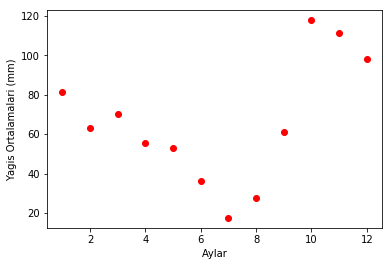

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
def verioku(dosyaadi):
    dosya = open(dosyaadi, "r")
    dosya.readline() # ilk satiri oku ve atla
    sayilar = []
    for satir in dosya:
        kelimeler = satir.split()
        sayi = float(kelimeler[1])
        sayilar.append(sayi)
    dosya.close()
    return sayilar

degerler = verioku("yagisortalamasi.dat")
ay_numaralari = range(1, 13)
plt.plot(ay_numaralari, degerler[:-1], "ro") # yillik yagisi cizdirmiyoruz
plt.xlabel("Aylar")
plt.ylabel("Yagis Ortalamalari (mm)")
plt.show()

Dikkat edecek olursaniz $dosya.readline()$ ifadesiyle bizi ilgilendirmeyen ilk yorum satırını (dosyanın içeriğinin tanıtıldığı satır) atlıyoruz. Ayrıca dosyanın son satırında yıllık ortalama yağış olduğu ve onu çizdirmek istemediğimiz için de $plt.plot$ ifadesinde ortalama yağış miktarlarını içeren $degerler$ listesindeki yıllık ortalama yağış miktarına gelen son değeri almıyoruz ($degerler[:-1]$). Son olarak $for$ döngüsünü hızlı liste özelliklerini kullanarak biraz daha kompakt hale getirebleceğimizi de söylemeliyiz.

In [7]:
def verioku(dosyaadi):
    dosya = open(dosyaadi, "r")
    dosya.readline() # ilk satiri oku ve atla
    sayilar = [float(satir.split()[1]) for satir in dosya]
    dosya.close()
    return sayilar

[Başa Dön](#Dosyalar,-Metinler-ve-Sözlükler)

# Sözlük Nesnesi: Dictionaries #
## Sözlük Nedir? ##

Listeler oldukça esnek ve kullanışlı bir veri türü olmasına karşın bir dezavantajları elemanlarına ulaşmak için tam sayı indeksleri kullanmak zorunluluğudur. Bunun yerine indeksin de bir metin nesnesi (ya da başka bir nesne türü) olabildiği bir veri türü kullanmak oldukça kullanışlı olabilir düşüncesiyle <b><i>sözlük</i></b> ($dictionary$) veri türü yaratılmıştır.  

Diyelim ki Stockholm, Manchester ve Berlin için sıcaklık değerlerini içeren bir listemiz olsun ($sicaklik = [13, 15.4, 17.5]$). Örneğin Manchester'ın sıcaklık değerine ulaşmak istiyorsak onun liste içindeki yerini bilmeliyiz ($sicaklik[1]$). Bunun yerine indekslerin şehirlerin isimleri olduğu bir sözlük türü değişken kullanmak daha akılcı olacaktır.

In [16]:
sicaklik = {'Stockholm': 11.5, 'Manchester': 13.8, 'Berlin': 12.1}
sicaklik = dict(Stockholm=11.5, Manchester=13.8, Berlin=12.1) # alternatif yol

Bir sözlük değişkenine sonradan veri eklemek oldukça kolaydır. Örneğin Marsilya şehri için sıcaklığı ekleyelim.

In [17]:
sicaklik['Marsilya'] = 23.1

Sözlük değişkenin metin indekslerine <i>anahtar</i> ($key$) adı verilir. Değişkenin her bir anahtara karşılık bir de <i>değeri</i> ($value$) vardır.  Bir $for$ döngüsü içinde bir sözlüğün değerlerine ulaşmanın yolu $for$ $key$ $in$ $sozluk$ yapısını kullanmaktır.

In [18]:
for sehir in sicaklik:
    print('{:s} sehrindeki sicaklik {:g} derecedir.'.format(sehir,sicaklik[sehir]))

Marsilya sehrindeki sicaklik 23.1 derecedir.
Stockholm sehrindeki sicaklik 11.5 derecedir.
Berlin sehrindeki sicaklik 12.1 derecedir.
Manchester sehrindeki sicaklik 13.8 derecedir.


Bir sözlük değişkeninde bir anahtarın bulunup bulunmadığını sorgulamak için $if$ $key$ $in$ $sozluk$ ifadesi kullanılır.

In [19]:
if 'Paris' in sicaklik:
    print('{:s} sehrinde sicaklik {:g} derecedir'.format('Paris',sicaklik['Paris']))
else:
    print('Paris icin sicaklik verisi yoktur!')

Paris icin sicaklik verisi yoktur!


Bir sözlük değişkenin anahtar ve değerleri ayrı ayrı listelerde toplanabilir.

In [20]:
print(sicaklik.keys())
print(sicaklik.values())

dict_keys(['Marsilya', 'Stockholm', 'Berlin', 'Manchester'])
dict_values([23.1, 11.5, 12.1, 13.8])


Bir sözlük değişkenin anahtar sıralaması kolay tahmin edilemeyebilir (her seferinde farklı bir sırlamayla karşı karşıya kalabilirsiniz!). Bunu aşmanın yolu anahtara göre sözlüğü sıralamaktır ($sorted$). 

In [21]:
for sehir in sorted(sicaklik):
    print(sehir)

Berlin
Manchester
Marsilya
Stockholm


Bir sözlük değişkeninden eleman silmek (del) için anahtarını kullanmak gerekir.

In [22]:
del sicaklik['Stockholm']

Nümerik dizilerde olduğu gibi sözlüklerin de kopyası oluşturulmadan yapılacak bir değişiklik aynı sözlüğe atıfta bulunan diğer sözlüğün de değişmesine neden olur. Bunu aşmanın yolu yine $copy$ metodunu kullanmaktır.

In [23]:
sicaklik_kopya = sicaklik
print("Degisiklik oncesi sicaklik sozlugu: ", sicaklik)
print("Degisiklik oncesi sicaklik_kopya sozlugu: ", sicaklik_kopya)
del sicaklik['Marsilya']
print("sicaklik sozlugunden eleman silme sonrasi sicaklik sozlugu (kopyalamadan): ", sicaklik)
print("sicaklik sozlugunden eleman silme sonrasi sicaklik_kopya sozlugu (kopyalamadan): ", sicaklik_kopya)
sicaklik_kopya = sicaklik.copy()
sicaklik['Ankara'] = 18.3
print("sicaklik sozlugune eleman ekleme sonrasi sicaklik sozlugu: ", sicaklik)
print("sicaklik sozlugune eleman ekleme sonrasi sicaklik_kopya sozlugu : ", sicaklik_kopya)

Degisiklik oncesi sicaklik sozlugu:  {'Marsilya': 23.1, 'Berlin': 12.1, 'Manchester': 13.8}
Degisiklik oncesi sicaklik_kopya sozlugu:  {'Marsilya': 23.1, 'Berlin': 12.1, 'Manchester': 13.8}
Eleman silme sonrasi sicaklik sozlugu (kopyalamadan):  {'Berlin': 12.1, 'Manchester': 13.8}
Eleman silme sonrasi sicaklik_kopya sozlugu (kopyalamadan):  {'Berlin': 12.1, 'Manchester': 13.8}
Eleman ekleme sonrasi sicaklik sozlugu:  {'Ankara': 18.3, 'Berlin': 12.1, 'Manchester': 13.8}
Eleman eklem sonrasi sicaklik_kopya sozlugu:  {'Berlin': 12.1, 'Manchester': 13.8}


[Başa Dön](#Dosyalar,-Metinler-ve-Sözlükler)

## Örnek 1: Tam Sayı Anahtarlar ve Polinomlar ##

Sözlük anahtarları sadece metin ($string$) olmak zorunda değildir. Listeler ve sözlüklerin kendisi içeriği değiştirilebilir (<i>mutable</i>) nesneler olduğu için anathar olamazlar, ancak onun dışındaki tüm değişken türleri ($int$, $float$, $complex$, $str$, $tuple$) içerikleri değiştirilemediği (<i>immutable</i> oldukları) için anahtar olarak kullanılabilirler. 
    
Güzel bir örnek olarak $p(x) =  -1 + x^2 - 3x^7$ polinomunu düşünelim. Bu polinoma ilişkin veri kuvvet-katsayı ikilileri olarak düşünülebilir. Anahtarı kuvvetler, değerleri katsayılar olan bir sözlük değişken bir polinomu saklamak için iyi bir yoldur. Bunu bir listeyle (ya da diziyle) de yapabilirsiniz ancak bu durumda katsayısı 0 olan tüm kuvvetler için 0 katsayısını listenize (ya da dizinize) koymak zorunda kalırsınız. Ayrıca sözlük kullanarak negatif kuvvetler için de katsayı saklayabilirsiniz.

In [25]:
p = {0:-1, 2:1, 7:-3}

Herhangi bir $x$ değeri için polinomun alacağı değeri hesaplayan bir fonksiyon aşağıdaki şekilde yazılabilir.

In [26]:
def polinom(pol,x):
    toplam = 0.0
    for kuvvet in pol:
        toplam += pol[kuvvet]*x**kuvvet
    return toplam

In [27]:
print(polinom(p,2.0))

-381.0


Daha kompakt bir yazım için liste yöntemlerini ve toplam ($sum$) fonksiyonunu kullanabilirsiniz.

In [28]:
def polinom(pol,x):
    return sum([pol[kuvvet]*x**kuvvet for kuvvet in pol])

[Başa Dön](#Dosyalar,-Metinler-ve-Sözlükler)

## Örnek 2: Sözlük ve Dosya Verisi ##

Aşağıda bazı maddeler için yoğunluk değerlerinin yer aldığı $yogunluk.dat$ dosyasının içeriği verilmiştir. Bu dosyanın içeriğini okurken madde isimlerini anahtar ($key$), yoğunluk değerlerini ise değer ($value$) olarak kabul eden bir sözlük kullanmak iyi bir fikirdir.

hava			0.0012 <br>
gaz				0.67 <br>
buz				0.9 <br>
saf su  		1.0 <br>
deniz suyu		1.025 <br>
insan vucudu	1.03 <br>
kirec tasi  	2.6 <br>
granit     		2.7 <br>
demir       	7.8 <br>
gumus      		10.5 <br>
civa     		13.6 <br>
altin        	18.9 <br>
platin   		21.4 <br>
dunya_ort  		5.52 <br>
dunya_cekirdek	13 <br>
ay        		3.3 <br>
gunes_ort    	1.4 <br>
gunes_cekirdek	160 <br>
proton      	2.8E+14 <br>

Böyle bir dosyayı düzgün ve efektif bir şekilde okuyabilmek için aşağıdaki gibi bir Python kodu kullanabilirsiniz. Madde isimlerinde kelimelerin arasındaki boşluklar özel olarak bırakılmıştır. Bu dersin ilerleyen slaytlarında bu tür yapıların nasıl yönetileceği de anlatılacaktır.

In [30]:
def yogunluk_oku(dosyaadi):
    dosya = open(dosyaadi, 'r')
    yogunluklar = {}
    for satir in dosya:
        kelimeler = satir.split()
        # yogunluk tum satirlarin en sonundadir
        yogunluk = float(kelimeler[-1])
        # eger yogunluga kadar birden fazla kelime varsa
        # bunlar birlestirilerek madde adini olusturmalidir
        if len(kelimeler[:-1]) == 2:
            madde = kelimeler[0] + ' ' + kelimeler[1]
        else:
            madde = kelimeler[0]
        # simdi sozlugu dolduralim
        yogunluklar[madde] = yogunluk
    dosya.close()
    return yogunluklar

yogunluklar = yogunluk_oku('yogunluk.dat')
print(yogunluklar)

{'gaz': 0.67, 'gunes_cekirdek': 160.0, 'platin': 21.4, 'dunya_cekirdek': 13.0, 'buz': 0.9, 'ay': 3.3, 'dunya_ort': 5.52, 'gunes_ort': 1.4, 'granit': 2.7, 'insan vucudu': 1.03, 'altin': 18.9, 'proton': 280000000000000.0, 'deniz suyu': 1.025, 'civa': 13.6, 'saf su': 1.0, 'kirec tasi': 2.6, 'demir': 7.8, 'gumus': 10.5, 'hava': 0.0012}


[Başa Dön](#Dosyalar,-Metinler-ve-Sözlükler)

## Örnek 3: İçiçe Sözlükler ve Dosya Verisi ##

Aşağıda son yıllarda geçiş yöntemiyle keşfedilen bazı gezegenlerin gün cinsinden yörünge dönemi (P), ölçülebilidiyse geçiş sırasındaki ışık değişiminin genliği ($dm$), hesaplanabilidiyse $R_{jüp}$ cinsinden yarıçapı (R), geçişin dakika cinsinden toplam süresi ($dt$) bir tablo şeklinde yer almaktadır ($tablo.dat$). Bazı parametreler için ölçüm ya da hesap yapılamadığını dikkat alarak, ortalama değerlerini hesaplayıp $veri[parametre]['ortalama']$ şeklinde saklamak istiyor olalaım.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; P &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; dm &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; R &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; dt <br>
1 &nbsp;&nbsp;&nbsp; 11.7 &nbsp;&nbsp;&nbsp; 0.035 &nbsp;&nbsp;&nbsp; 2.8 &nbsp;&nbsp;&nbsp; 99.1 <br>
2 &nbsp;&nbsp;&nbsp; 9.2 &nbsp;&nbsp;&nbsp;	0.037 &nbsp;&nbsp;&nbsp; 3.2 &nbsp;&nbsp;&nbsp;	101.2 <br>
3 &nbsp;&nbsp;&nbsp; 12.2 &nbsp;&nbsp;&nbsp; no &nbsp;&nbsp;&nbsp; no &nbsp;&nbsp;&nbsp; 105.2 <br>
4 &nbsp;&nbsp;&nbsp; 10.1 &nbsp;&nbsp;&nbsp; 0.031 &nbsp;&nbsp;&nbsp; no &nbsp;&nbsp;&nbsp;	102.1 <br>
5 &nbsp;&nbsp;&nbsp; 9.1 &nbsp;&nbsp;&nbsp; 0.033 &nbsp;&nbsp;&nbsp; 2.6 &nbsp;&nbsp;&nbsp;	103.3 <br>
6 &nbsp;&nbsp;&nbsp; 8.7 &nbsp;&nbsp;&nbsp;	0.036 &nbsp;&nbsp;&nbsp; 3.1 &nbsp;&nbsp;&nbsp; 101.9

Bu yapıda bir dosyayı okuyabilmek için içiçe sözlüklerden yararlanmak iyi bir fikir olacaktır. Bu tür sözlüklerde değerler de birer sözlük olabilmektedir.

In [34]:
dosya = open('tablo.dat', 'r')
satirlar = dosya.readlines()
dosya.close()
veri = {}   #  veri[parametre][gezegen_no] = parametre_degeri
ilk_satir = satirlar[0]
parametreler = ilk_satir.split()

for parametre in parametreler:
    veri[parametre] = {}

for satir in satirlar[1:]:
    kelimeler = satir.split()
    i = int(kelimeler[0])       # gezegen no'su
    degerler = kelimeler[1:]      # parametrelerin degerleri
    for p, d in zip(parametreler,degerler):
        if d != 'no':
            veri[p][d] = float(d)

# Ortalama hesabi
for parametre in veri:
    degerler = veri[parametre].values()
    veri[parametre]['ortalama'] = sum(degerler)/len(degerler)


for parametre in sorted(veri):
    print('{:s} parametresinin ortalama degeri = {:g}'.format\
        (parametre, veri[parametre]['ortalama']))

P parametresinin ortalama degeri = 10.1667
R parametresinin ortalama degeri = 2.925
dm parametresinin ortalama degeri = 0.0344
dt parametresinin ortalama degeri = 102.133


[Başa Dön](#Dosyalar,-Metinler-ve-Sözlükler)

# Metin Nesnesi: Strings #
## Metin Nedir? ##

Şu ana kadar metin değişkenleri sayılara (tam ya da reel) dönüştürüp, üzerlerinde işlem yapmayı öğrendik ancak metin değişkenlerin üzerinde işlem yapmayı öğrenmedik. Bu tür değişkenleri kullanmak programcılığın önemli bir parçasıdır ve özellikle dosya işlemlerinde vazgeçilmezdir.

Metin değişkenlerde indeksleme ve metin değişkenin bir bölümünü kullanma tıpkı listeler, demetler ve dizilerde tanımlandığı gibidir.

In [36]:
s = "Rasathanede saat 10:00'daki sicaklik -4 derecedir"
print("s[12:] -->", s[12:])
print("s[12:-10] -->", s[12:-10])

s[12:] --> saat 10:00'daki sicaklik -4 derecedir
s[12:-10] --> saat 10:00'daki sicaklik -4


Bir metnin içerisinde diğer bir metni aramak için $find$ metodu kullanılır. Fonksiyon söz konusu metni bulursa bu metnin ilk karakterinin bulunduğu endeksi, bulamazsa $-1$ döndürür. Ayrıca $startswith$ ve $endswith$ fonksiyonları da bir metin verilen bir başka metinle sırasıyla başlıyor ya da bitiyor ise $True$ döndürür, aksi halde $False$ döndürür.

In [39]:
s = "Rasathanede saat 10:00'daki sicaklik -4 derecedir"
print("s metni:", s)
print("'Rasathane' metni s icinde {:d}. indeksten baslamaktadir.".format(s.find('Rasathane')))
print("'derece metni s icinde {:d}. indeksten baslamaktadir.".format(s.find('derece')))
print("'Derece metni ise s icinde bulunmadigindan {:d} dondurur".format(s.find('Derece')))
print("'Rasathane' metni s icinde var midir?")
print('Rasathane' in s)
print("'Derece' metni s icinde var midir?")
print('Derece' in s)
print("s metni 'Rasathane' metni ile baslamaktadir?")
print(s.startswith('Rasathane'))
print("s metni 'Derecedir' metni ile bitmektedir?")
print(s.endswith('Derecedir'))

s metni: Rasathanede saat 10:00'daki sicaklik -4 derecedir
'Rasathane' metni s icinde 0. indeksten baslamaktadir.
'derece metni s icinde 40. indeksten baslamaktadir.
'Derece metni ise s icinde bulunmadigindan -1 dondurur
'Rasathane' metni s icinde var midir?
True
'Derece' metni s icinde var midir?
False
s metni 'Rasathane' metni ile baslamaktadir?
True
s metni 'Derecedir' metni ile bitmektedir?
False


$s.replace(s1,s2)$ ifadesi $s$ metin değişkeni içerisinde $s1$'in bulunduğu bütün yerleri $s2$ ile değiştirir.

In [40]:
print(s.replace(' ', '_'))
print(s.replace("Rasathanede","AUKR'de"))

Rasathanede_saat_10:00'daki_sicaklik_-4_derecedir
AUKR'de saat 10:00'daki sicaklik -4 derecedir


Bir metni bileşenlerine (kelimelerine) ayırma işlemi $split$ metodu ile yapılır. Metodun çıktısı bir listedir. Not: Dikkat ederseniz son uyguladığımız $replace$ fonksiyonu s'nin içeriğini değiştirmedi. Zira metinler de içeriği değiştirilemez (<i>immutable</i>) değişkenlerdir. Bu işlem ancak bu ifadeyi bir başka metin değişkene (aynı isimle de olabilir!) atarsak geerçekleşir.

In [42]:
print(s.split())
# split'in varsayilan ayraci bosluktur ama isterseniz degistirebilirsiniz
print(s.split(':'))
t = '1.satir\n2.satir\n3.satir'
print(t)
print(t.splitlines())

['Rasathanede', 'saat', "10:00'daki", 'sicaklik', '-4', 'derecedir']
['Rasathanede saat 10', "00'daki sicaklik -4 derecedir"]
1.satir
2.satir
3.satir
['1.satir', '2.satir', '3.satir']


Tüm karakterleri büyük ($upper$ metodu) ya da küçük ($lower$ metodu) harflerle yazdırmak da mümkündür.

In [43]:
print(s.lower())
print(s.upper())

rasathanede saat 10:00'daki sicaklik -4 derecedir
RASATHANEDE SAAT 10:00'DAKI SICAKLIK -4 DERECEDIR


Metin içeriğinin değiştirilemez (<i>immutable</i>) olduğunu bir örnekle görelim.

In [44]:
s[18] = '1'

TypeError: 'str' object does not support item assignment

$isdigit$ metodu bir metin değişkenin sadece sayılardan oluşup oluşmadığını denetler.

In [46]:
print("214".isdigit())
print(" 214 ".isdigit())
print("2.14".isdigit())

True
False
False


$isspace$ metodu bir metin değişkenin boşluk içerip içermediğini denetler.

In [47]:
print(" ".isspace()) # sadece bosluktan olusan bir metin
print(" \n".isspace()) # bir bosluk ve yeni satir karakterinden olusan bir metin
print(" \t ".isspace()) # bir bosluk ve TAB karakterinden olsuan bir metin
print("".isspace()) # bos metin (bosluk icermez!)

True
True
True
False


$strip$ metodu bir metin değişkenin başı ve sonundaki boşlukları atmak için kullanılır. Not: Yeni satır karakterinin (\n) dikkate alınmadığına dikkat ediniz!

In [49]:
s = ' basi / sonu bosluk iceren metin \n'
print(s.strip())
# bastaki (soldaki) bosluklari atar
print(s.lstrip())
# sondaki (sagdaki) bosluklari atar
print(s.rstrip())

basi / sonu bosluk iceren metin
basi / sonu bosluk iceren metin 

 basi / sonu bosluk iceren metin


$join$ metodu birden fazla metin değişkeni istediğiniz bir karakteri kullanarak bilreştirebilirsiniz.

In [50]:
yildizlar = ["Vega", "Deneb", "Altair"]
yaz_ucgeni = ",".join(yildizlar)
print(yaz_ucgeni)

Vega,Deneb,Altair


[Başa Dön](#Dosyalar,-Metinler-ve-Sözlükler)

## Örnek 1: Dosyadan Koordinat Okumak ##

Aşağıda $x$,$y$ düzlemi üzerinde bazı noktaların koordinatları verilmiştir ($koordinatlar.dat$). Bu koordinatları okuyan ve bir liste içerisine demet değişken üçlüleri şeklinde ($koor[i] = (x,y,z)$) yerleştiren bir program yazmaya çalışıyor olalım. Bazı sayılar için “=” işaretinden sonra boşluk olduğuna, bazılarında olmadığına dikkat ediniz. Bu durumda boşluktan ayırma ($split()$ metodu) bizim için bir seçenek değil.

&nbsp;&nbsp; x=-1.345 &nbsp;&nbsp;&nbsp;&nbsp; y= 0.1112 &nbsp;&nbsp;&nbsp;&nbsp; z= 9.1928 <br>
&nbsp;&nbsp; x=-1.231 &nbsp;&nbsp;&nbsp;&nbsp; y=-0.1251 &nbsp;&nbsp;&nbsp;&nbsp; z= 1001.2 <br>
&nbsp;&nbsp; x= 0.100 &nbsp;&nbsp;&nbsp;&nbsp; y= 1.4344E+6 &nbsp;&nbsp;&nbsp;&nbsp;  z=-1.0100 <br>
&nbsp;&nbsp; x= 0.200 &nbsp;&nbsp;&nbsp;&nbsp; y= 0.0012 &nbsp;&nbsp;&nbsp;&nbsp; z=-1.3423E+4 <br>
&nbsp;&nbsp; x= 1.5E+5 &nbsp;&nbsp;&nbsp;&nbsp; y=-0.7666 &nbsp;&nbsp;&nbsp;&nbsp; z= 1027

<u>Çözüm 1.</u> Dosyaya dikkatli bakınca “x= “ ifadesinin her satırın 2., “y= “ ifadesinin 16., “z= “ ifadesinin 31. sütundan başladığını görüyoruz (1'den saymaya başlarsak! İndeksleri için 0'dan saymaya başladığımızı unutmayınız!). Bu durumdan faydalanarak çözümü aşağıdaki şekilde arayabiliriz.

In [54]:
from numpy import array
dosya = open("koordinatlar.dat", "r")
koor = [] # (x,y,z) demet degiskenleri
for satir in dosya:
    x_baslangic = 2
    y_baslangic = 17
    z_baslangic = 32
    x = satir[x_baslangic+2:y_baslangic]
    y = satir[y_baslangic+2:z_baslangic]
    z = satir[z_baslangic+2:]
    print("koordinatlar: x='{:s}', y='{:s}', z='{:s}'".format(x,y,z))
    koor.append((float(x), float(y), float(z)))
dosya.close()
koor = array(koor)
print(koor.shape, koor)

koordinatlar: x='-1.345       ', y=' 0.1112      ', z=' 9.1928
'
koordinatlar: x='-1.231       ', y='-0.1251      ', z=' 1001.2
'
koordinatlar: x=' 0.100       ', y=' 1.4344E+6   ', z='-1.0100
'
koordinatlar: x=' 0.200       ', y=' 0.0012      ', z='-1.3423E+4
'
koordinatlar: x=' 1.5E+5      ', y='-0.7666      ', z=' 1027
'
(5, 3) [[-1.3450e+00  1.1120e-01  9.1928e+00]
 [-1.2310e+00 -1.2510e-01  1.0012e+03]
 [ 1.0000e-01  1.4344e+06 -1.0100e+00]
 [ 2.0000e-01  1.2000e-03 -1.3423e+04]
 [ 1.5000e+05 -7.6660e-01  1.0270e+03]]


<u>Çözüm 2.</u> "x= ", "y= ", "z= " ifadelerinin nereden başladığını saymak yerine (ki bu iyi bir alışkanlık da değildir) bu ifadelerin hangi indekste başladığını $find()$ metodu ile bulabiliriz. Bu durumda kodumuzda ilgili yerleri aşağıdaki şekilde düzeltmemiz yeterli olacaktır.

In [58]:
from numpy import array
dosya = open("koordinatlar.dat", "r")
koor = [] # (x,y,z) demet degiskenleri
for satir in dosya:
    x_baslangic = satir.find("x=")
    y_baslangic = satir.find("y=")
    z_baslangic = satir.find("z=")
    x = satir[x_baslangic+2:y_baslangic]
    y = satir[y_baslangic+2:z_baslangic]
    z = satir[z_baslangic+2:]
    koor.append((float(x), float(y), float(z)))
dosya.close()
koor = array(koor)
print(koor.shape, koor)

(5, 3) [[-1.3450e+00  1.1120e-01  9.1928e+00]
 [-1.2310e+00 -1.2510e-01  1.0012e+03]
 [ 1.0000e-01  1.4344e+06 -1.0100e+00]
 [ 2.0000e-01  1.2000e-03 -1.3423e+04]
 [ 1.5000e+05 -7.6660e-01  1.0270e+03]]


<b><u>Çözüm 3.</u></b> $split()$ metodunda ayracı "=" yaparak satırların = işaretinden ayrılmasını sağlayabilir, ='in öncesini değişkenin adına, sonrasını değerine atayabiliriz. Bu durumda kodumuz aşağıdaki şekilde olacaktır.

In [57]:
from numpy import array
dosya = open("koordinatlar.dat", "r")
koor = [] # (x,y,z) demet degiskenleri
for satir in dosya:
    kelimeler = satir.split("=")
    x = float(kelimeler[1][:-1])
    y = float(kelimeler[2][:-1])
    z = float(kelimeler[3])
    koor.append((float(x), float(y), float(z)))
dosya.close()
koor = array(koor)
print(koor.shape, koor)

(5, 3) [[-1.3450e+00  1.1120e-01  9.1928e+00]
 [-1.2310e+00 -1.2510e-01  1.0012e+03]
 [ 1.0000e-01  1.4344e+06 -1.0100e+00]
 [ 2.0000e-01  1.2000e-03 -1.3423e+04]
 [ 1.5000e+05 -7.6660e-01  1.0270e+03]]


Programcılıkta bir problemi çözmenin birden fazla yolu vardır. Programcı bu yolların olabildiğince hepsini düşünüp, en optimize (yazma, okuma ve çalışma bakımından) ve hızlı olanını seçmelidir. Bu örnekler bize eğer veri dosyasını oluşturma imkanı da programcının elindeyse onu en kolay ve hızlı okunacak şekilde oluşturması gerektiğini de göstermektedir.

[Başa Dön](#Dosyalar,-Metinler-ve-Sözlükler)

## Örnek 2: Dosyalara Metin Yazmak ##

Bir dosyaya yazdırmak için onu iki moddan birinde açmak gerekir: "$w$" ($write$: dosya oluşturup yazma modu), "$a$" ($append$: var olan bir dosyanın sonuna ekleme modu). 

$$ciktidosyasi = open("dosyaadi","w")$$
$$ciktidosyasi = open("dosyaadi", "a")$$

Bir metni dosyaya yazdırırken $write()$ metodu kullanılır. Ancak bu metod $print$ ifadesinden farklı olarak metnin sonuna yeni $satır$ karakteri (\n) eklemez. Bunu sizin eklemeniz gerekir!

$$ ciktidosyasi.write("metin" + "\n") $$

İlk örnek olarak aşağıdaki (içiçe) listeyi düzgün bir tablo şeklinde bir dosyaya yazdırmak istiyor olalım:

In [64]:
veri = [[ 0.75,  0.29619813, -0.29619813, -0.75 ],
[ 0.29619813, 0.11697778, -0.11697778, -0.29619813],
[-0.29619813, -0.11697778, 0.11697778, 0.29619813],
[-0.75, -0.29619813, 0.29619813, 	0.75 ]]

Bu listenin her bir elemanı olan listeleri satır kabul edip, tek tek onları almalı, her bir satıra denk gelen listenin her bir elemanını da bir sütuna yazdırarak ilerlemeliyiz. Her bir satırın sonuna yeni satır karakteri ("\n") eklemeyi unutmamalıyız.

Bu durumda kodumuz aşağıdaki şekilde olacaktır. Kodu çalıştırdıktan sonra aynı dizinde oluşacak olan $tmp\_tablo.dat$ isimli dosyayı bir metin editörü ile inceleyiniz.

In [65]:
ciktidosyasi = open("tmp_tablo.dat", "w")
for satir in veri:
    for sutun in satir:
        ciktidosyasi.write("{:14.8}".format(sutun))
    ciktidosyasi.write("\n")
ciktidosyasi.close()

Kodumuza aşağıdaki satırları ekleyerek satır ve sütun sayılarını da göstermek isteyebiliriz. Bunun için satır sayısı ve sütun sayısını da bilmeliyiz.

In [ ]:
sutunsayisi = len(veri[0])
ciktidosyasi.write(" ")
for i in range(1,sutunsayisi+1):
    ciktidosyasi.write("{:10s} ".format("sutun {:d}".format(i)))
    ciktidosyasi.write("\n")

Gördüğünüz gibi $write$ metodunda $sutun + str(i)$  de yazdırabilirdik ancak $print$ fonksiyonu gibi formatlamayı tercih ettik. Zira bu şekilde tüm metnin belirli sayıda karaktere sığdırılmasını otomatik olarak kontrol etmiş oluyoruz. Dosya yazarken tablo görünümünün korunması ve dosyanın kolay okunabilmesi için $print$ fonksiyonundaki gibi (yer tutucular ({} ya da %) kullanarak) yazdırmak iyi bir çözümdür.

Şimdi de satır numaralarını ekleyelim ve sütun numaralarını eklediğimiz ve veriyi yazdirdigimiz kodla bunu birleştirelim.

In [72]:
veri = [[ 0.75, 0.29619813, -0.29619813, -0.75 ],
[ 0.29619813, 0.11697778, -0.11697778, -0.29619813],
[-0.29619813, -0.11697778, 0.11697778, 0.29619813],
[-0.75, -0.29619813, 0.29619813, 0.75 ]]

ciktidosyasi = open("tmp_tablo.dat", "w")

sutunsayisi = len(veri[0])
ciktidosyasi.write("           ")
for i in range(1,sutunsayisi+1):
    ciktidosyasi.write("{:s} ".format("sutun {:d}".format(i)))
ciktidosyasi.write("\n")

satir_sayaci = 1
for satir in veri:
    ciktidosyasi.write("satir {:2d}".format(satir_sayaci))
    for sutun in satir:
        ciktidosyasi.write("{:14.8f}".format(sutun))
    ciktidosyasi.write("\n")
    satir_sayaci += 1

ciktidosyasi.close()

Bu kodu çalıştırdığınızda oluşacak $tmp\_tablo.dat$ dosyasını inceleyiniz ve yapısını nasıl daha da güzel bir tablo haline getirebileceğininiz planlayarak, kodunuzu geliştiriniz.

# Alıştırmalar #

1. Anahtarı ($key$) kuvvetler, değerleri ($value$) katsayılar olan sözlük yapısındaki iki polinomu ($pol1$ ve $pol2$) argüman olarak alan ve bu iki polinomu topladıktan sonra çağrılıdğı yere yine aynı yapıda bir sözlük ($toplam_polinom$) olarak döndüren bir fonksiyon ($polinom_toplami$) yazınız. Fonksiyonunuzu $4x^5 + x^3 - 2$ polinomu ile $x^3 + x^2 - 2$ polinomlarını toplayarak test ediniz.

2. WASP gezegen araştırmasında WASP-47 yıldızının etrafında keşfedilen 4 gezegenin kütle ($M$) ve yarıçapları <a href="http://ozgur.astrotux.org/ast415/Ders_07/wasp47.dat" target="_blank">wasp47.dat</a>) dosyasında verilmiştir. Öncelikle $gezegenler$ adında boş bir sözlük oluşturunuz. Size verilen dosyayı okumak ("$r$") için açtıktan sonra, satır satır okuyunuz. Her bir satırı $split()$ komutuyla boşluklardan ayırdıktan sonra oluşan metinleri $parametreler$ adlı bir listede toplayınız. Bu listenin ilk elemanını ($parametreler[0]$) $gezegen$ değişkenine, diğer elemanlarını ($parametreler[1:]$) ise daha önce oluşturduğunuz $gezegenler$ adlı sözlüğe $gezegen$ değişkenini anahtar ($gezegenler[gezegen]$) kabul eden bir değer listesi olarak alınız. Bir for döngüsü içinde $gezegenler$ sözlüğünü anahtarlarından okuyacağınız gezegen adlarına karşılık, değerlerden alacağınız parametreler listesi şeklinde ekrana yazdırınız.

3. Bir önceki soruda yazdığınız kodu, $parametre\_adlari$ listesinin elemanları olarak tanımlayacağınız $kutle$  ve $yaricap$ parametre adlarını anahtar kabul eden değerlerini ise herbir gezegen için dosyadan okuyacağınız kayan noktalı sayı ($float$) değerleri olarak alan ($parametreler[1]$ ve ($parametreler[2]$) içiçe bir sözlük oluşturacak şekilde düzenleyiniz.

4. Bir önceki soruda yazdığınız kodu, ilk satırı atlamak yerine ilk satırdaki ikinci ve üçüncü sütunlarda yer alan parametre adlarını (sırasıyla $kutle$ ve $yaricap$) her bir gezegenin parametrelerini alacağınız sözlüklerin anahtarı olacak şekilde düzenleyiniz.

5. $ogrenciler = ['pinar','buse','zeynep','javid']$ listesindeki elemanların her birini $ogrenciler.txt$ isimli bir dosyanın birer satırına bir döngü içerisinde yazdırınız. Dosyayı kapattıktan sonra bu kez sadece sonuna ekleme için açarak "$ozgur$" metnini yeni bir satıra ekleyiniz ve dosyayı tekrar kapatınız.

6. $ogrenciler.txt$ dosyasını yazmak için yeniden oluşturunuz. Dosyanın ilk satırına $Ogr.No$ metni ile $Ad Soyad$ metinlerini aralarına "$<TAB>$" karakteri gelecek şekilde yazınız. Daha sonra 

$$ogrenciler = \{"12050566":'Pinar Tunc', "15050021":'Buse Sayar', "14050019":'Zeynep Kucukdeveci', "14050335":'Javid Bashirzade'\}$$ 

sözlüğündeki her bir öğrencinin, öğrenci numarası (sözlüğün anahtarları) ile adı ile soyadını (sözlüğün değerleri) aralarına "$<TAB>$" karakteri geleecek şekilde bu dosyanın birer satırına yazdırınız. 

7. <a href="http://ozgur.astrotux.org/ast415/Ders_07/xy.dat" target="_blank">xy.dat</a> dosyasında iki sütun halinde verilen $x$ değerlerine karşılık $y$ değerlerini, sırasıyla $x$ ve $y$ listelerinde toplayınız. Bu listeleri $numpy$ dizilerine ($array$) dönüştürdükten sonra $x$'e karşılık $y$ değerlerini $matpotlib.pyplot$ fonksiyonlarını kullanarak kırmızı içi dolu yuvarlaklarla çizdiriniz. Grafiğinizin $x$ ve $y$ eksenlerini isimlendiriniz.

8. Güneş Sistemi gezegenlerinin adları ($gezegenler$) ve gün cinsinden yörünge dönemleri ($donemler$) aşağıdai listelerde verilmiştir.

$$gezegenler = ['Merkur','Venus','Dunya','Mars','Jupiter','Saturn', 'Uranus','Neptun']$$
$$donemler = [88.0, 224.7, 365.25, 687.0, 4331.0, 10747.0, 30589.0, 59800.0]$$

Her bir gezegenin adını anahtar, yorunge dönemini değer olarak alan $gunes\_sistemi$ adlı bir sözlük oluşturunuz. Oluşturduğunuz bu sözlüğün her bir elemanının adını ve yıl birimine dönüştüreceğiniz yörünge dönemini iki basamaklı olarak $gunes\_sistemi.txt$ dosyasına aralarına "$<TAB>$" karakteri gelecek şekilde satır satır yazdırınız.

[Başa Dön](#Dosyalar,-Metinler-ve-Sözlükler)

# Örnek: WASP gezegenleri #

<a href="http://exoplanet.eu" target="_blank">exoplanet.eu</a> keşfedilen tüm ötegezegenlerin parametrelerine ulaşabileceğiniz eşsiz bir katalog sunar.  Bu katalogu sorgulamak üzere çok sayıda seçenekle donatılmş bir de arama motoru bulunmaktadır. Bu odevde WASP gezegen araştırmasında keşfedilen tüm gezegenlerin kütle ($M$), yarıçap ($R$), yörünge dönemi ($P$), yörünge yarıbüyük eksen uzunluğu ($a$), yörünge dışmerkezliliği ($e$) ve geçiş derinliği ($\delta$) değerlerini içeren bir veri dosyası (<a href="http://ozgur.astrotux.org/ast415/Ders_07ornekveri_WASP.dat" target="_blank">ornekveri_WASP.dat</a>) üzerinde çalışacaksınız. 

1. <i>ornekveri_WASP.dat</i> dosyasını açıp, başlık satırını $split$ metoduyla boşluklardan ayırmakla elde edeceğiniz her bir sütunun adını başlangıçta boş olarak oluşturacağınız $gezegenler$ isimli bir sözlüğün anahtar kelimelerine (keyword) atayınız. Bu sözlükte her bir anahtar kelimenin değeri (value) boş bir liste olsun.

2. Bu dosyanın her bir satırını tek tek okuyup, yine $split$ metoduyla her bir sütundaki veri değerini alıp (sayısal olması gereken değerleri float ile sayıya dönüştürdükten sonra), ilgili listeye ekleyiniz. Sonuç olarak gezegenler sözlüğündeki her bir anahtar kelimenin (örneğin $gezegenler['a']$) o parametrenin tüm gezegenler için değerlerini sırayla içersin.

3. Sadece sayısal veri içeren listeleri birer $numpy$ dizisine dönüştürünüz.

4. Newton yasalarından hareketle aşağıdaki şekilde ifade edilen Kepler'in 3. yasasını kullanarak her bir sistemin barınak yıldızının kütlelerini (Güneş biriminde) hesaplayınız ve <i>yildiz_kutle</i> isimli bir $numpy$ dizisinde toplayınız. (Veri dosyasında yarı büyük eksen uzunluğu Astronomi Birimi (AB), yörünge dönemi Dünya günü ve gezegen kütlesi Jüpiter kütlesi birimlerinde verilmiştir. $M_{jup} = 1.898x10^{27}$ kg, $M_{\odot} = 1.99x10^{30}$ kg alınız.) 

$$a^3 = \frac{G (M_{*} + M_{g})}{4 \pi^2} P^2 $$

5. WASP geçiş yöntemiyle gezegen arayan bir proje olduğu için tüm gezegenlerin yıldızlarının önünden geçerken neden oldukları ışık kaybının miktarı (geçiş ışık eğrisi derinliği ($\delta$)) bilinmektedir ve veri dosyasinda $derinlik$ isimli sütunda verilmiştir. Geçiş derinliği, gezegenle yıldızın yarıçapları oranına aşağıdaki şekilde bağlıdır. 

$$\delta = (\frac{R_{g}}{R_{*}})^2 $$

Bu bağıntıyı ve veri dosyasında Jüpiter biriminde sağlanan gezegen yarıçapını ($R_g$) kullanarak her bir barınak yıldızın yarıçapını ($R_{*}$) hesaplayınız ($R_{jup} = 69991$ km, $R_{\odot} = 695510$ km alınız.) ve <i>yildiz_yaricap</i> isimli bir $numpy$ dizisinde toplayınız.

6. Yıldızı mükemmel bir küre varsayarak ve <i>yildiz_kutle</i> ile <i>yildiz_yaricap</i> değerlerini kullanmak suretiyle tüm yıldızlar için $g / cm^3$ cinsinden ortalama bir yoğunluk değeri hesaplayınız ve <i>yildiz_yogunluk</i> $numpy$ dizisinde toplayınız.

7. Sonuç olarak elde ettiğiniz bu üç diziyi ve yıldızların adlarını yazdırmak üzere <i>ornekveri_WASP_yildizlar.dat</i> adını vereceğiniz bir dosya oluşturunuz.

8. Bu dosyanın ilk satırına aralarında $<TAB>$ ile boşluklar bırakacak şekilde sırasıyla, "yildiz","kutle","yaricap","yogunluk" kelimelerini yazdırınız.

9. Dosyanın geri kalanına her bir sistemdeki yıldızın adını, kütlesini, yarıçapını ve ortalama yoğunuğunu aralarında $<TAB>$ ile boşluklar bırakacak şekilde yazdırınız.

10. Bu dosyayı bir metin editörüyle açarak doğru yazılıp yazılmadığını denetleyiniz.

[Başa Dön](#Dosyalar,-Metinler-ve-Sözlükler)